In [1]:
# Project goal - To use movies dataset to test whether the budget of the film and the gross income is correlated.

# Main variables = "Gross income" denoted by gross and "Budget" denoted by budget

# First step is to import relevant libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots

df = pd.read_csv(r'C:\Users\Ashis\Google Drive\Ashish Personal\Personal Documents\Learning\Portfolio website\Data set\Cinema data\movies.csv')



In [2]:
df.head()   #Looking at top five rows of the dataset to get the feel of the data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Let us look at the data fields and their types

print (df.dtypes)

# We see the data fields with the their type. 'object' refers to strings, int64 refers to whole numbers 
# while float64 refers to decimal numebrs

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [10]:
 # We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:                                     #the loop wil go through all the columns and check missing data
    missingpercent = np.mean(df[col].isnull())             #we used numpy package here
    print('{} - {}%'.format(col, round(missingpercent*100)))
    
# We see that there are missing data for budget (28%) as well as gross (2%) fields. 
# Although on a larger scale, this should not be a big problem, but we still need to be aware of this while interpretating the results.

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [13]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


<AxesSubplot:>

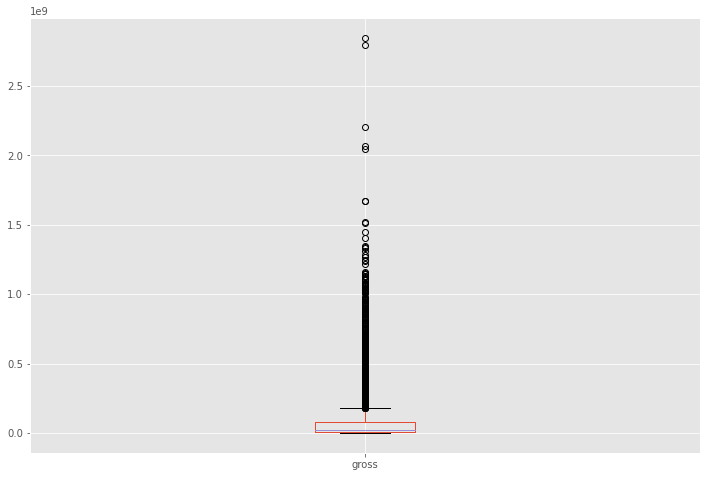

In [14]:
# Let us look for outliers in gross

df.boxplot(column=['gross'])

# We do see a few outliers making the distribution left skewed.

<AxesSubplot:>

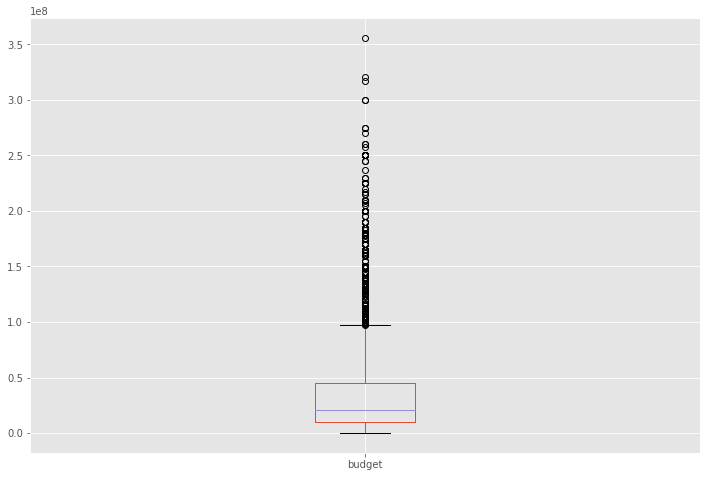

In [15]:
# Let is do the same for budget

df.boxplot(column=['budget'])

# We do see a few outliers making the distribution left skewed.

<AxesSubplot:xlabel='gross', ylabel='budget'>

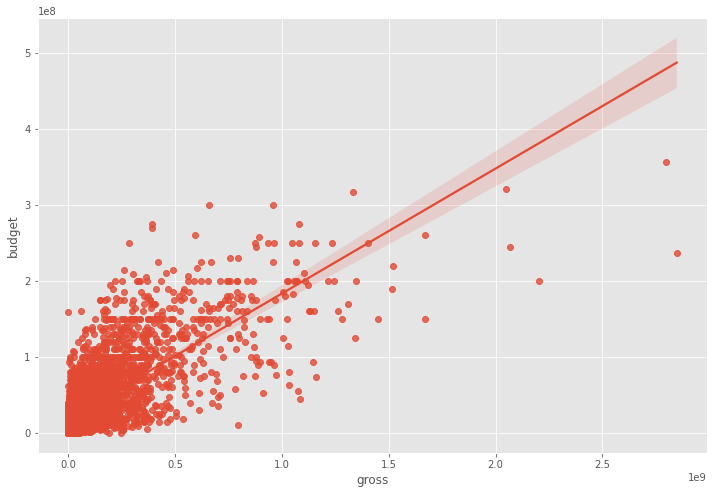

In [16]:
# Let us get started with the correlation

sns.regplot(x="gross", y="budget", data=df)

# We already see a positive correlation. However it is pretty much still visual.
# We still need statistical correlation to see how strong the coorelation is.

In [18]:
# Given the nature of the two key variables. We are going to use pearson's correlation coefficient to see the strength and significane of the correlation.
# A pearson correlation coefficient ranges fron +1 to -1 with both end signifying perfect positive or negative.
# 0 signifies no correlation.

df.corr(method ='pearson')

# It was an overkill but we tested the correlation of all the numeric variables in the dataset.
# The results show that the corerlation coefficient between "Gross income" or gross and "Budget of the film" or budget is 0.74.
# This is a strong positive correlation. This means that as the budget of the movie rises, the gross income also rises.

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


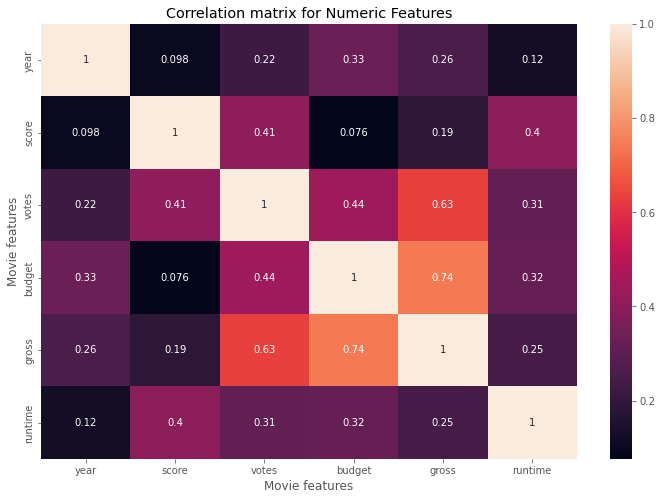

In [21]:
# Let us go a step further and make a visual correlation matrix with the numeric variables in the dataset

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

# You can see that it is the same matrix but colourful!
# Unlike the previous table this is much easier to read due to the heat map.
# Black denotes no or poor correlation while white signifies perfecet correlation.